In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
final_data = pd.read_csv("../../data/mergent_and_library/final_data_v2.csv")
final_data

,Unnamed: 0,duns,company_name,firstname,lastname,title,gender,flag_owner,flag_presi_vicepresi,prob_nw_eth_wiki,...,primary_naics,naics2,naics_name,flag_executive_reported,geoid,prop_nwh,geometry,prob_spacy,prob_gt,prob_ld
0,0,00-138-3244,"WILSON, LYNNFORD SAMUEL JR",Lynnford,Wilson,Owner,U,1,0,0.917946,...,621111,62,Health Care and Social Assistance,1,5.105948e+10,26.602177,"c(-77.324596, 38.999535)",0.999995,0.0,1
1,1,00-145-3948,CROCODILE CONSULTING,Jessica,Moore,Administrative Assistant Sales,FEMALE,0,0,NaN,...,541611,54,"Professional, Scientific, and Technical Services",1,5.105948e+10,20.372268,"c(-77.389534, 38.994397)",0.000000,0.0,0
2,2,00-145-3948,CROCODILE CONSULTING,Leonard,Caldwell,Owner,MALE,1,0,NaN,...,541611,54,"Professional, Scientific, and Technical Services",1,5.105948e+10,20.372268,"c(-77.389534, 38.994397)",0.000000,0.0,0
3,3,00-171-0412,CENTREVILLE TAX SERVICE LLC,Scott,Walls,Owner,MALE,1,0,0.087375,...,541213,54,"Professional, Scientific, and Technical Services",1,5.105949e+10,19.153605,"c(-77.460635, 38.8639)",0.999994,0.0,1
4,4,00-183-0152,KAUFMAN ASSOC,Betsy,Kaufman,Owner,FEMALE,1,0,0.957856,...,541618,54,"Professional, Scientific, and Technical Services",1,5.105942e+10,36.208236,"c(-77.08656, 38.777228)",0.999673,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,18151,96-994-4219,"GEOPAY, INC.",Karla,Russell,Chief Operating Officer,FEMALE,0,0,0.747244,...,812990,81,Other Services (except Public Administration),1,5.105948e+10,34.302699,"c(-77.331479, 38.948677)",0.000000,0.0,0
18152,18152,96-995-4812,K EDWARD ROBINSON & ASSOCIATES LLC,Keith,Robinson,Pres-ceo,MALE,0,0,NaN,...,541611,54,"Professional, Scientific, and Technical Services",1,5.105942e+10,62.402930,"c(-77.230478, 38.707725)",0.999673,0.0,1
18153,18153,96-996-0488,"LAGNIAPPE CONSULTING, LLC",Wallace,Daniels,Owner,MALE,1,0,0.064103,...,541612,54,"Professional, Scientific, and Technical Services",1,5.105942e+10,60.324061,"c(-77.097715, 38.7433)",0.000000,0.0,0
18154,18154,96-996-0488,"LAGNIAPPE CONSULTING, LLC",Omar,Daniels,Co-owner,MALE,0,0,0.022954,...,541612,54,"Professional, Scientific, and Technical Services",1,5.105942e+10,60.324061,"c(-77.097715, 38.7433)",0.000000,0.0,0


In [4]:
flagged = pd.read_csv("../../data/mergent_and_library/mergent_flagged_fuzzy.csv.xz") 
flagged

,duns,company_name0,address,city,state,zipcode,flag_mergent,pos,flag_axle,flag_sbsd,flag_chamber,flag_yelp,flag_listing,flag_mergent_plus_listing,founding_year,primary_naics,naics2,naics_name,flag_executive_reported
0,00-100-9468,antique arts,10710 ANITA DR,lorton,VA,22079,0,NaN,0,0,0,0,0,0,1982.0,459510,45,Retail Trade,0
1,00-101-0797,the virginia cotillion,2107 FORESTHILL RD,alexandria,VA,22307,0,NaN,0,0,0,0,0,0,1990.0,611610,61,Educational Services,0
2,00-101-8212,northgate condominium associates,1520 NORTHGATE SQ OFC 2,reston,VA,20190,0,NaN,0,0,0,0,0,0,1993.0,531110,53,Real Estate and Rental and Leasing,0
3,00-102-0168,supra data systems,11250 ROGER BACON DR # 2,reston,VA,20190,0,NaN,0,0,0,0,0,0,0.0,541511,54,"Professional, Scientific, and Technical Services",0
4,00-103-8103,ls technologies,2750 PROSPERITY AVE # 400,fairfax,VA,22031,1,NaN,0,0,0,0,0,1,2000.0,561110,56,Administrative and Support and Waste Managemen...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166735,96-999-6557,fairfax county virginia,3721 STONECROFT BLVD,chantilly,VA,20151,0,NaN,0,0,0,0,0,0,0.0,922120,92,Public Administration,0
166736,96-999-7233,continental accountants,3713 S GEORGE MASON DR 216W,falls church,VA,22041,0,NaN,0,0,0,0,0,0,2011.0,541211,54,"Professional, Scientific, and Technical Services",0
166737,96-999-7860,jaclyn cowan,9682 BARLOW RD,fort belvoir,VA,22060,0,NaN,0,0,0,0,0,0,2011.0,561990,56,Administrative and Support and Waste Managemen...,0
166738,96-999-8157,federal human capital partners,5870 TRINITY PKWY STE 400,centreville,VA,20120,0,NaN,0,0,0,0,0,0,0.0,541612,54,"Professional, Scientific, and Technical Services",0


In [6]:
# clean the flagged dataset to filter down to companies that were created before 1964
flagged = flagged[pd.notna(flagged['founding_year'])]
pre_1964 = flagged[flagged['founding_year'] <= 1964]
pre_1964 = pre_1964[pre_1964['founding_year']!= 0]
#pre_1964 = pre_1964[['duns', 'company_name0', 'founding_year']]

In [7]:
# cleaned final data 
final_data = final_data[final_data['prob_nw_eth_wiki']!= 1.0]
final_data = final_data[pd.notna(final_data['prob_nw_eth_wiki'])]

In [8]:
# number of companies flag in the listings
n = final_data['flag_listing'].sum()
n

35

In [9]:
# filter out NaN values for wiki

subset_listed = final_data[final_data['flag_listing']==1]
subset_nonlisted = final_data[final_data['flag_listing']==0]
sample = subset_nonlisted.sample(n,replace=False)
data = pd.concat([subset_listed, sample])
#merged_data.columns

In [10]:
data.columns

Index(['Unnamed: 0', 'duns', 'company_name', 'firstname', 'lastname', 'title',
       'gender', 'flag_owner', 'flag_presi_vicepresi', 'prob_nw_eth_wiki',
       'prob_nw_eth_fl_reg_name', 'prob_nw_eth_fl_five_cat',
       'prob_nw_eth_census_fn', 'prob_nw_eth_census_ln', 'prob_nw_eth_nc',
       'company_name0', 'address', 'city', 'state', 'zipcode', 'flag_mergent',
       'pos', 'flag_axle', 'flag_sbsd', 'flag_chamber', 'flag_yelp',
       'flag_listing', 'flag_mergent_plus_listing', 'founding_year',
       'primary_naics', 'naics2', 'naics_name', 'flag_executive_reported',
       'geoid', 'prop_nwh', 'geometry', 'prob_spacy', 'prob_gt', 'prob_ld'],
      dtype='object')

In [11]:
# select columns for the model and cean 
data_model = data[["duns", "company_name0", 'flag_mergent', "flag_listing", "flag_mergent_plus_listing", "prob_nw_eth_wiki", "flag_owner",  'naics2', 'naics_name', 'prop_nwh']]
data_model

,duns,company_name0,flag_mergent,flag_listing,flag_mergent_plus_listing,prob_nw_eth_wiki,flag_owner,naics2,naics_name,prop_nwh
127,00-347-7485,dsb management consultants,1,1,1,0.039917,0,54,"Professional, Scientific, and Technical Services",42.839879
1807,01-563-2647,saratoga barber,0,1,1,0.879487,0,81,Other Services (except Public Administration),48.057168
2848,02-322-8477,hair salon by diana,0,1,1,0.032602,0,81,Other Services (except Public Administration),41.428040
2936,02-338-4567,ortega das,0,1,1,0.141399,0,54,"Professional, Scientific, and Technical Services",30.527350
2937,02-338-4567,ortega das,0,1,1,0.675826,0,54,"Professional, Scientific, and Technical Services",30.527350
...,...,...,...,...,...,...,...,...,...,...
465,00-630-8554,paladin consulting solutions,0,0,0,0.059264,0,54,"Professional, Scientific, and Technical Services",15.866446
1703,01-502-6943,gomti traders,0,0,0,0.284845,0,42,Wholesale Trade,45.409656
16268,86-133-4360,northern virginia radio control club,0,0,0,0.053822,0,51,Information,24.401544
18085,96-907-4421,venutec corporation,0,0,0,0.973347,0,32,Manufacturing,67.727950


In [12]:
data_model = data_model[pd.notna(data_model['prob_nw_eth_wiki'])]
data_model = data_model[pd.notna(data_model['flag_owner'])]
data_model = data_model[pd.notna(data_model['naics2'])]
data_model = data_model[pd.notna(data_model['prop_nwh'])]

In [13]:
# Decison Tree #1. with companies not filtered to pre 1964
feature_cols = ["prob_nw_eth_wiki", "flag_owner", "naics2", "prop_nwh"]
Y = data_model['flag_listing']
X = data_model[feature_cols]

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,Y)

#Predict the response for test dataset
# y_pred = clf.predict(X)

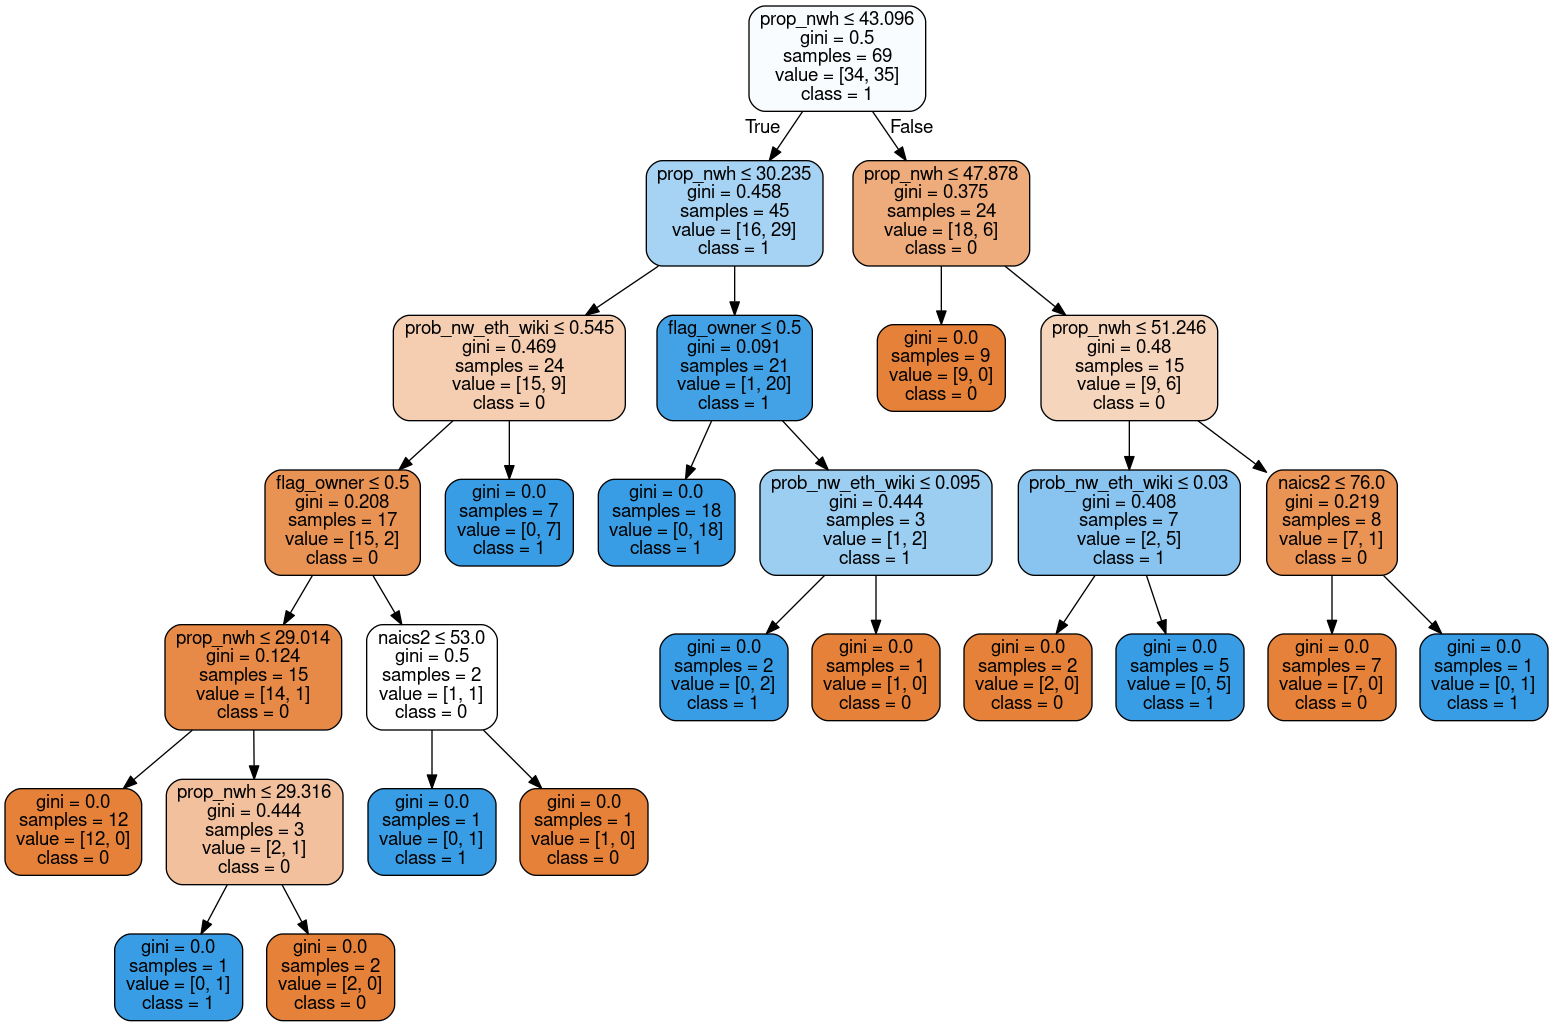

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decTreeWiki.png')
Image(graph.create_png())

In [16]:
# doing same thing, but with pre 1964 companies on the other side 
subset_nonlisted_pre = pre_1964[pre_1964['flag_listing']==0]
sample = subset_nonlisted_pre.sample(n,replace=False)
pre_1964_data = pd.concat([subset_listed, sample])

In [17]:
data_model_pre = pre_1964_data[["duns", "company_name0", 'flag_mergent', "flag_listing", "flag_mergent_plus_listing", "prob_nw_eth_wiki", "flag_owner",  'naics2', 'naics_name', 'prop_nwh']]
data_model_pre

,duns,company_name0,flag_mergent,flag_listing,flag_mergent_plus_listing,prob_nw_eth_wiki,flag_owner,naics2,naics_name,prop_nwh
127,00-347-7485,dsb management consultants,1,1,1,0.039917,0.0,54,"Professional, Scientific, and Technical Services",42.839879
1807,01-563-2647,saratoga barber,0,1,1,0.879487,0.0,81,Other Services (except Public Administration),48.057168
2848,02-322-8477,hair salon by diana,0,1,1,0.032602,0.0,81,Other Services (except Public Administration),41.428040
2936,02-338-4567,ortega das,0,1,1,0.141399,0.0,54,"Professional, Scientific, and Technical Services",30.527350
2937,02-338-4567,ortega das,0,1,1,0.675826,0.0,54,"Professional, Scientific, and Technical Services",30.527350
...,...,...,...,...,...,...,...,...,...,...
126927,19-996-0410,vienna aquatic club,0,0,0,NaN,NaN,71,"Arts, Entertainment, and Recreation",NaN
42043,04-053-3242,resecon,0,0,0,NaN,NaN,54,"Professional, Scientific, and Technical Services",NaN
50934,04-951-7287,tadjer-cohen-edelson associates,0,0,0,NaN,NaN,54,"Professional, Scientific, and Technical Services",NaN
84057,08-113-0387,tyson's corner animal hospital,0,0,0,NaN,NaN,54,"Professional, Scientific, and Technical Services",NaN


In [18]:
data_model_pre = data_model[pd.notna(data_model['prob_nw_eth_wiki'])]
data_model_pre = data_model[pd.notna(data_model['flag_owner'])]
data_model_pre = data_model[pd.notna(data_model['naics2'])]
data_model_pre = data_model[pd.notna(data_model['prop_nwh'])]

In [19]:
feature_cols = ["prob_nw_eth_wiki", "flag_owner", "naics2", "prop_nwh"]
Y_pre = data_model['flag_listing']
X_pre = data_model[feature_cols]

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_pre,Y_pre)

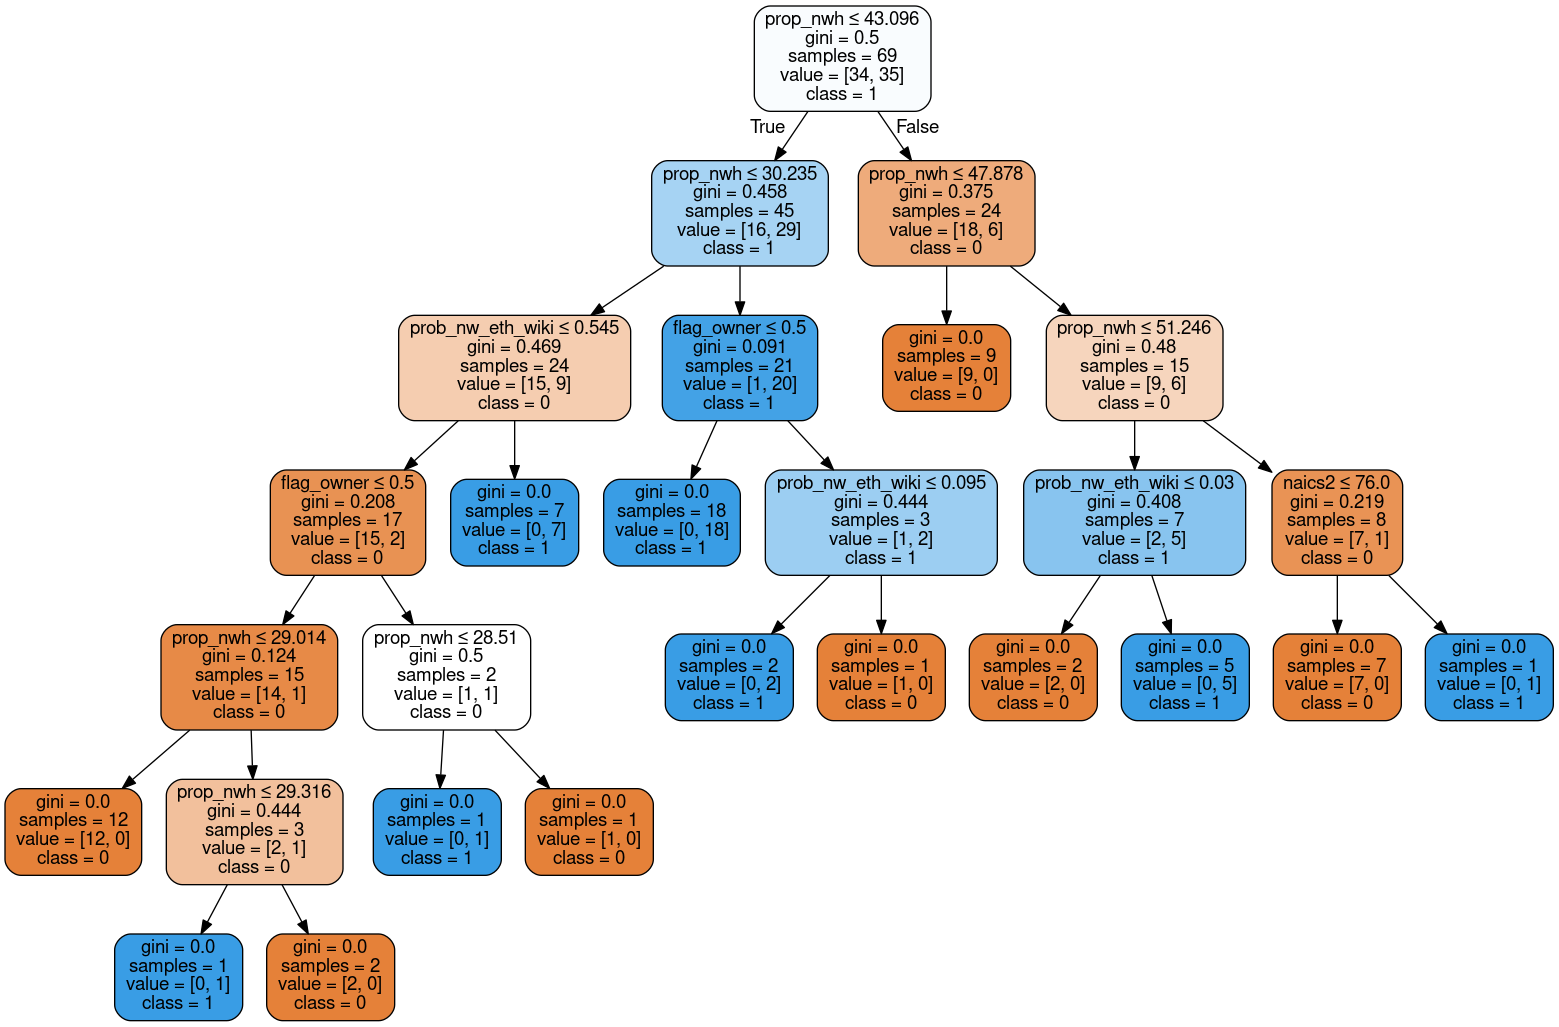

In [21]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decTreeWiki_pre1964.png')
Image(graph.create_png())

In [4]:
#listing = test[test['flag_mergent_plus_listing']==1]
execs_listing = test[test['flag_executive_reported']==1]
listings = execs_listing.drop(['pos', 'flag_axle', 'flag_sbsd', 'flag_chamber', 'flag_yelp', 'founding_year', 'primary_naics', 'naics2', 'naics_name'], axis=1)

In [5]:
listings

,duns,company_name0,address,city,state,zipcode,flag_mergent,flag_listing,flag_mergent_plus_listing,flag_executive_reported
21,00-138-3244,wilson lynnford samuel jr,10917 GEORGETOWN PIKE,great falls,VA,22066,0,0,0,1
25,00-145-3948,crocodile consulting,1522 SHELLBARK PL,herndon,VA,20170,0,0,0,1
45,00-171-0412,centreville tax service,5403 CLUBSIDE LN,centreville,VA,20120,0,0,0,1
56,00-183-0152,kaufman assoc,6477 BRICK HEARTH CT,alexandria,VA,22306,0,0,0,1
58,00-187-1792,arthur deborah atty,5031A BACKLICK RD,annandale,VA,22003,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
166665,96-989-8225,international institute for non proliferation ...,2400 LITTLE FOX LN,vienna,VA,22181,0,0,0,1
166693,96-994-4219,geopay,11150 SUNSET HILLS RD,reston,VA,20190,0,0,0,1
166703,96-995-4812,k edward robinson & associates,9250 CARDINAL FOREST LN,lorton,VA,22079,0,0,0,1
166705,96-996-0488,lagniappe consulting,3880 HAVENWOOD PL,alexandria,VA,22309,1,0,1,1


In [ ]:
wiki = nlp_values[nlp_values['prob_nw_eth_wiki']!= 1.0]
prob_wiki = wiki[pd.notna(wiki['prob_nw_eth_wiki'])]

In [7]:
inputs = pd.merge(test, nlp_values, how="inner", on='duns', left_index=True)

In [8]:
inputs

,duns,company_name0,address,city,state,zipcode,flag_mergent,pos,flag_axle,flag_sbsd,...,title,gender,flag_owner,flag_presi_vicepresi,prob_nw_eth_wiki,prob_nw_eth_fl_reg_name,prob_nw_eth_fl_five_cat,prob_nw_eth_census_fn,prob_nw_eth_census_ln,prob_nw_eth_nc
9837,00-138-3244,wilson lynnford samuel jr,10917 GEORGETOWN PIKE,great falls,VA,22066,0,NaN,0,0,...,Owner,U,1,0,0.932760,0.621759,NaN,NaN,0.339193,NaN
17099,00-145-3948,crocodile consulting,1522 SHELLBARK PL,herndon,VA,20170,0,NaN,0,0,...,Owner,MALE,1,0,NaN,NaN,NaN,NaN,NaN,NaN
17100,00-145-3948,crocodile consulting,1522 SHELLBARK PL,herndon,VA,20170,0,NaN,0,0,...,Administrative Assistant Sales,FEMALE,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14699,00-171-0412,centreville tax service,5403 CLUBSIDE LN,centreville,VA,20120,0,NaN,0,0,...,Owner,MALE,1,0,0.087020,0.103534,NaN,NaN,NaN,NaN
11497,00-183-0152,kaufman assoc,6477 BRICK HEARTH CT,alexandria,VA,22306,0,NaN,0,0,...,Owner,FEMALE,1,0,0.958493,0.847558,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,96-994-4219,geopay,11150 SUNSET HILLS RD,reston,VA,20190,0,NaN,0,0,...,Chief Operating Officer,FEMALE,0,0,0.734884,0.953091,0.581874,0.602393,0.011385,0.566017
17908,96-995-4812,k edward robinson & associates,9250 CARDINAL FOREST LN,lorton,VA,22079,0,NaN,0,0,...,Pres-ceo,MALE,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4114,96-996-0488,lagniappe consulting,3880 HAVENWOOD PL,alexandria,VA,22309,1,NaN,0,0,...,Owner,MALE,1,0,0.063193,0.189099,0.387877,0.199878,0.096082,0.267925
4115,96-996-0488,lagniappe consulting,3880 HAVENWOOD PL,alexandria,VA,22309,1,NaN,0,0,...,Co-owner,MALE,0,0,0.022094,0.133987,0.361135,0.248325,0.126127,0.552511


In [ ]:
input1 = input[['duns', 'company_name0']]

In [ ]:
input2 = input[['prob_nw_eth_wiki']]